# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as stats
import random

In [3]:
df = pd.read_csv('titanic.csv')

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [4]:
df.info()
df.head()
'''
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


'\nVariable\tDefinition\tKey\nsurvival\tSurvival\t0 = No, 1 = Yes\npclass\tTicket class\t1 = 1st, 2 = 2nd, 3 = 3rd\nsex\tSex\t\nAge\tAge in years\t\nsibsp\t# of siblings / spouses aboard the Titanic\t\nparch\t# of parents / children aboard the Titanic\t\nticket\tTicket number\t\nfare\tPassenger fare\t\ncabin\tCabin number\t\nembarked\tPort of Embarkation\tC = Cherbourg, Q = Queenstown, S = Southampton\n'

**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [5]:
# mean of the age column
age_overall = df.Age.mean()
age_overall

29.69911764705882

In [6]:
# mean of the age column filtering by survivors
age_alive = df["Age"][df['Survived'] == 1].mean()
age_alive

28.343689655172415

In [7]:
# mean of the age column filtering by survivors and first class passengers
age_dead_class1 = df['Age'][df['Survived'] == 0][df['Pclass'] == 1].mean()
age_dead_class1

43.6953125

In [8]:
# mean of the age column filtering by survivors, males, and Queenstown embarkers
age_alive_man_over30_notQ = df['Age'][df['Survived'] == 1][df['Sex'] == 'male'][df['Embarked'] != 'Q'].mean()
age_alive_man_over30_notQ

27.257282608695654

**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [9]:
# list of the previous results
age_list = [age_overall, age_alive, age_dead_class1, age_alive_man_over30_notQ]

# list comkprehension subtracting the items of the list from the median of the age column
["{}: {} years from the median".format(age, df['Age'].median() - age) for age in age_list]

['29.69911764705882: -1.69911764705882 years from the median',
 '28.343689655172415: -0.34368965517241534 years from the median',
 '43.6953125: -15.6953125 years from the median',
 '27.257282608695654: 0.7427173913043461 years from the median']

**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [10]:
# identity of the item in the pclass column with the highest count
df.Pclass.value_counts().idxmax()

3

In [11]:
# identity of the item in the embarked column with the highest count
df.Embarked.value_counts().idxmax()

'S'

In [12]:
# identity of the item in the sibsp column with the highest count, filtering by survivors
df[df.Survived == 1]["SibSp"].value_counts().idxmax()

0

**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [13]:
deviation = (df.Fare.median() - df.Fare.mean())/df.Fare.std()

# if else logic for the deviation from the mean 
if deviation > -1 and deviation < 1:
    print("0-1, ", end='')
    if deviation > 0:
        print("above the mean")
    else:
        print("below the mean")
elif (deviation > 1 and deviation < 2) or (deviation < -1 and deviation > -2):
    print("1-2, ", end='')
    if deviation > 0:
        print("above the mean")
    else:
        print("below the mean")
elif (deviation > 2 and deviation < 3) or (deviation < -2 and deviation > -3):
    print("2-3, ", end='')
    if deviation > 0:
        print("above the mean")
    else:
        print("below the mean")


0-1, below the mean


**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [14]:
# subtracting the 90th quantile ticket from the 5th
price_difference = df.Fare.quantile(.9) - df.Fare.quantile(.05)
print("Price difference: %s" % price_difference)

# selecting the first element in an array composed of the classes where the fare is equal to the 90th quantile. Had to
# slice the array since there are multiple cases where the fare is equal to the 90th quantile. Repeated process for the 5th
print("90th percentile class: %s" % df['Pclass'][df['Fare'] == df.Fare.quantile(.9)].values[0])
print("5th percentile class: %s" % df['Pclass'][df['Fare'] == df.Fare.quantile(.05)].values[0])

Price difference: 70.7333
90th percentile class: 1
5th percentile class: 3


**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [15]:
# grouping the fare column by port, getting the index of the highest mean while dropping NaNs
df.groupby('Embarked')['Fare'].mean().dropna().idxmax()

'C'

**What is the most common passenger class for each port?**

In [70]:
# grouping the pclass column by port
grouped = df.groupby('Embarked')['Pclass']

# pulling the index and value for the max value counts for each port
for name, group in grouped:
    print(name, group.value_counts().idxmax())

C 1
Q 3
S 3


**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [89]:
# calculation of double the median
double_med_fare = df.Fare.median() * 2

# new dataframe of surviving 1st class males without NaNs
rich_males = df[df['Sex'] == 'male'][df['Survived'] == 1].dropna()

# slicing the fare list and counting values that are less than double the median, dividing by the total values in that
# column, and multiplying by 100 for percentage
rich_males['Fare'][rich_males['Fare'] < double_med_fare].count() / rich_males['Fare'].count() * 100

/Users/ross.blanchard/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


29.268292682926827

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [90]:
# slicing by above parameters
age_with_family = df['Age'][df['Survived'] == 1][df['SibSp'] != 0].dropna().mean()
age_without_family = df['Age'][df['Survived'] == 0][df['SibSp'] == 0].dropna().mean()

#difference calculation
age_with_family - age_without_family

-5.686756169212689

**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

Ticket fare quantile 1 : 10.909090909090908 survival rate
Ticket fare quantile 2 : 20.408163265306122 survival rate
Ticket fare quantile 3 : 32.69230769230769 survival rate
Ticket fare quantile 4 : 30.136986301369863 survival rate
Ticket fare quantile 5 : 14.035087719298245 survival rate
Ticket fare quantile 6 : 22.58064516129032 survival rate
Ticket fare quantile 7 : 12.676056338028168 survival rate
Ticket fare quantile 8 : 26.923076923076923 survival rate
Ticket fare quantile 9 : 43.82022471910113 survival rate
Ticket fare quantile 10 : 36.0655737704918 survival rate
Ticket fare quantile 11 : 35.18518518518518 survival rate
Ticket fare quantile 12 : 42.0 survival rate
Ticket fare quantile 13 : 45.90163934426229 survival rate
Ticket fare quantile 14 : 55.932203389830505 survival rate
Ticket fare quantile 15 : 40.42553191489361 survival rate
Ticket fare quantile 16 : 36.734693877551024 survival rate
Ticket fare quantile 17 : 45.28301886792453 survival rate
Ticket fare quantile 18 : 57.

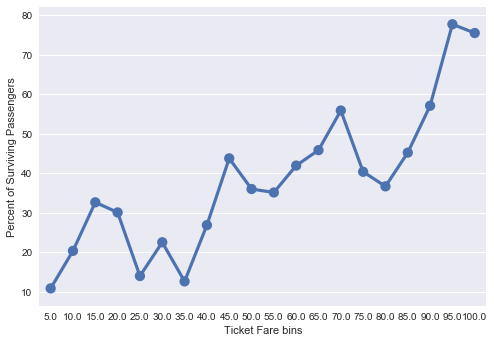

In [198]:
import seaborn as sns
# making a list of the quantiles to dicide the 
quantiles = []
for quantile in np.arange(0.05, 1.05, .05):
    quantiles.append(quantile)
    
# gets a list of the edges of each quantile in order to form the values for the survivors lists. 0 needs to be included
# initially for the first group
fare_list = [0]
for quantile in quantiles:
    fare_list.append(df.Fare.quantile(quantile))

# creating a blank list for plotting later
plot_points = []

#iterating over the list of fare edges
for index_end in range(1,len(fare_list)):
    index_start = index_end -1
    
    # slicing the survived column by using the first and second indices of the fare edge list as borders, counting the total
    survivors = df['Survived'][df['Survived'] == 1][df['Fare'] >= fare_list[index_start]][df['Fare'] <= fare_list[index_end]].count()
    
    # same process for the total number of people in each quantile, but without the survival selection
    total = df['Survived'][df['Fare'] >= fare_list[index_start]][df['Fare'] <= fare_list[index_end]].count()
    
    # print statement for solution
    print("Ticket fare quantile {} : {} survival rate".format(index_end, survivors/total * 100))
    
    # assigning percentages to a list for plotting
    plot_points.append(survivors/total * 100)

# used the quantiles as the x axis because it makes more sense visually. converted to numpy array for easy calcuations
quantiles = np.array(quantiles)*100

# standard plt.plot was acting wacky so used seaborn instead, easier to work with
sns.pointplot(y=plot_points, x=quantiles)
plt.ylabel('Percent of Surviving Passengers')
plt.xlabel('Ticket Fare as a percent of max price')

**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [98]:
df.Age.median()

28.0

In [95]:
df.Fare.median()

14.4542

In [99]:
df.SibSp.median()

0.0

In [101]:
df.Parch.median()

0.0

**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

Probably age - siblings, spouses, parents, and children have too few possibilities, and are heavily skewed by the amount of people that came on the boat by themselves. Fare is less likely to have correlation with survival

**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

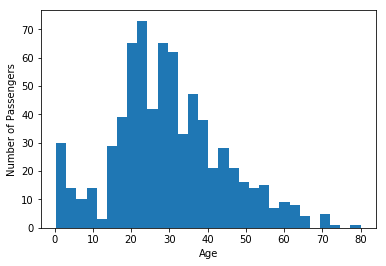

In [108]:
% matplotlib inline

# plotting the age column as a histogram with 30 bins
df.Age.plot(kind='hist', bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was between 25 and 40 years old
- A passenger was either younger than 20 years old or older than 50

In [20]:
# Survived
survived_percentage = df['Survived'][df['Survived'] == 1].count() / df.Survived.dropna().count() * 100
survived_percentage

38.383838383838381

In [114]:
# male
df['Sex'][df['Sex'] == 'male'].count() / df.Sex.dropna().count() * 100

64.758698092031437

In [117]:
# female; had siblings/spouse
df['Sex'][df['Sex'] == 'female'][df['SibSp'] >= 1].count() / df.Sex.dropna().count() * 100

15.712682379349047

In [119]:
# from Cherbourg
df['Embarked'][df['Embarked'] == 'C'].count() / df.Embarked.dropna().count() * 100

18.897637795275589

In [120]:
# younger than 10
df['Age'][df['Age'] < 10].count() / df.Age.dropna().count() * 100

8.6834733893557416

In [122]:
# between 25 and 40
df['Age'][df['Age'] > 25][df['Age'] < 40].count() / df.Age.dropna().count() * 100

35.014005602240893

In [126]:
# not between 20 and 50
(df['Age'][df['Age'] < 20].count() + df['Age'][df['Age'] > 50].count()) / df.Age.dropna().count() * 100

31.932773109243694

**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

In [21]:
stats.binom.pmf(k=42,        
                n=100,       
                p=survived_percentage/100)

0.061330411815167886

**What’s the probability that at least 42 of those 100 passengers survive?**

In [22]:
1 - stats.binom.cdf(k=42,        
                    n=100,       
                    p=survived_percentage/100) 

0.19807683025744727

**Write a function that takes N random samples of 100 passengers, and returns the fraction of those samples where at least 42 passengers survive.**

Choose a random seed and find approximately how many random samples you need to take before your fraction matches the probability you calculated (within Δp≈0.05Δp≈0.05).

It may help to visualize the survival fraction vs the number of random samples. Answers will vary based on the seed.

In [52]:
def survival3(seed):
    random.seed(seed)
    whole_col = df['Survived']
    
    # establishing a series of 100 random indices 
    random_range = np.array(random.sample(range(whole_col.count()-1), k=100))
    
    # establishing the percentage of survivors when the survivor column values are taken at the random indices
    survived_percentage = np.array([whole_col[index] for index in random_range]).sum()/100
    
    # probability of 42 passengers surviving with the success rate determined by the random indicies
    success_percentage = 1 - stats.binom.cdf(k=42,        
                                            n=100,       
                                            p=survived_percentage)
    
    # number of samplings it takes to reach the probability of 42 passengers surviving
    success_num = stats.geom.rvs(size=1, p=success_percentage)
    return int(success_num)
survival3(10)

1

**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**If so, at what level? If not, how do you know?**

In [16]:
# slicing dataframe for males and females and dropping na values
male_age = df["Age"][df['Sex'] == 'male'].dropna()
female_age = df['Age'][df['Sex'] == 'female'].dropna()

# independent ttest applies here - different independent groups comparison. equal_var=False for the different length arrays
stats.ttest_ind(male_age, female_age, equal_var=False)


Ttest_indResult(statistic=2.5258975171938896, pvalue=0.011814913211889735)

Ages between sexes are significantly different with a confidence of 98.9%

In [17]:
C_Fare = df["Fare"][df['Embarked'] == 'C']
Q_Fare = df['Fare'][df['Embarked'] == 'Q']

# independent ttest of the Queenstown fares and the Cherbourg fares, with different sized arrays
stats.ttest_ind(C_Fare, Q_Fare, equal_var=False)

Ttest_indResult(statistic=6.9951971047186809, pvalue=4.5792033919567422e-11)

Fares between ports are significantly different with a confidence of over 99.9%

**Accompany your p-values with histograms showing the distributions of both compared populations.**

/Users/ross.blanchard/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


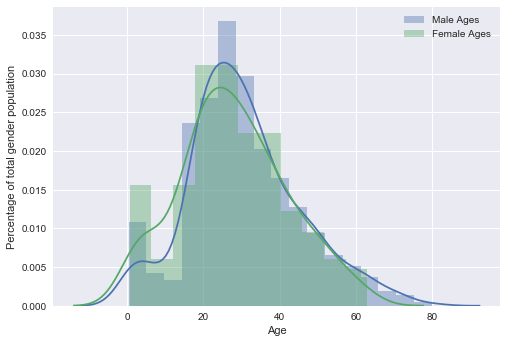

In [18]:
% matplotlib inline
import seaborn as sns

# seperate plots on the same axes for male age ditribution and demale age distribution
sns.distplot(male_age, label='Male Ages')
sns.distplot(female_age, label='Female Ages')
plt.ylabel('Percentage of total gender population')
plt.legend()

/Users/ross.blanchard/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


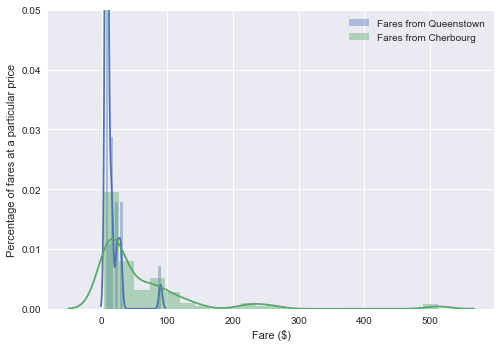

In [19]:
# graphing the previously determined fare columns filtered by embarking point
sns.distplot(Q_Fare, label='Fares from Queenstown')
sns.distplot(C_Fare, label='Fares from Cherbourg')
plt.ylabel('Percentage of fares at a particular price')
plt.xlabel('Fare ($)')

# had a very high outlier making the graph uninterpretable
plt.ylim(0,.050)
plt.legend()

**Did survivors pay more for their tickets than those that did not? If so, to what significance level?**

In [40]:
survivor_fares = df['Fare'][df['Survived'] == 1]
dead_fares = df['Fare'][df['Survived'] == 0]

# independent ttest comparing the fares of the survivors and the dead people, accounting for different sized columns
stats.ttest_ind(survivor_fares, dead_fares, equal_var=False)

26.0 10.5


Ttest_indResult(statistic=6.8390992590852537, pvalue=2.6993323503141236e-11)

Yes, with confidence of over 99.9%

**Did a given first-class passenger have less family members on board than a given third-class passenger? If so, to what significance level?**

In [36]:
# filtering the sibsp column by first and third classes
fclass_SibSp = df['SibSp'][df['Pclass'] == 1]
tclass_SibSp = df['SibSp'][df['Pclass'] == 3]

# independent ttest between the first class and the third class, accounting for different sizes of columns
stats.ttest_ind(fclass_SibSp, tclass_SibSp, equal_var = False)

Ttest_indResult(statistic=-2.6552496927000142, pvalue=0.0081039585917465958)

Yes, with confidence of 99.2%